In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_bald = cv2.imread('data/bald.jpg').astype(np.float32) / 255.0
image_hair = cv2.imread('data/hair.jpg').astype(np.float32) / 255.0
mask_hair = np.expand_dims(cv2.imread('data/mask_hair.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0, 2)
assert image_bald.shape == image_hair.shape and image_hair.shape[:2] == mask_hair.shape[:2]
assert mask_hair.shape[-1] == 1

In [2]:
def show(image_bgr, title=''):
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(image_rgb)
    if title:
        plt.title(title)
    plt.show()

In [3]:
def build_gaupyr(image, num_layer=8):
    image_curr = image.copy()
    result = [np.squeeze(image_curr)]
    for _ in range(num_layer):
        image_curr = cv2.pyrDown(image_curr)
        result.append(image_curr)
    assert len(result) == num_layer + 1
    return result

In [4]:
def build_lappyr(image, num_layer=8):
    image_curr = image.copy()
    gs = build_gaupyr(image, num_layer)
    result = [gs[-1]]
    for i in range(num_layer, 0, -1):
        result.append(gs[i-1] - cv2.resize(cv2.pyrUp(gs[i]), gs[i-1].shape[1::-1]))
    assert len(result) == num_layer + 1
    return result[::-1]

In [5]:
def show_imlist(lappyr):
    for i, im in enumerate(lappyr):
        show(im, "Level {}".format(i))

In [6]:
lappyr_bald = build_lappyr(image_bald, 6)
lappyr_mask = build_gaupyr(mask_hair, 6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


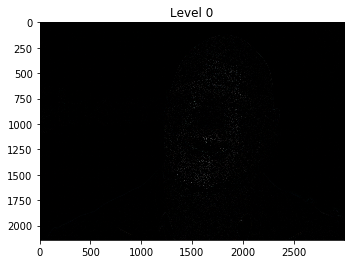

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


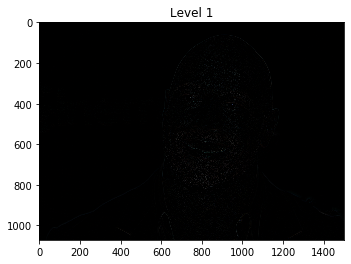

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


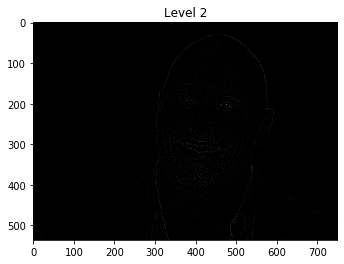

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


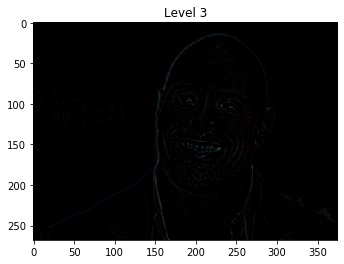

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


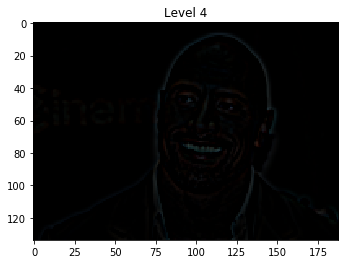

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


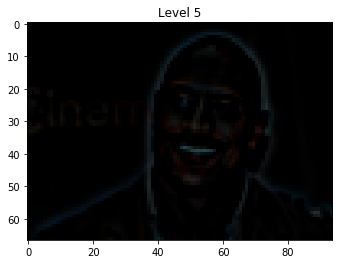

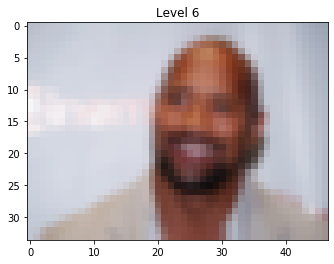

In [7]:
show_imlist(lappyr_bald)

In [22]:
def collapse_lappyr(lappyr):
    result = lappyr[-1]
    for lap in lappyr[::-1][1:]:
        result = cv2.resize(cv2.pyrUp(result), lap.shape[1::-1]) + lap
    return result

In [32]:
lappyr_bald = build_lappyr(image_bald, 8)
lappyr_hair = build_lappyr(image_hair, 8)
gaupyr_mask = build_gaupyr(mask_hair, 8)

lappyr_result = []
for lap_bald, lap_hair, mask in zip(lappyr_bald, lappyr_hair, gaupyr_mask):
    assert lap_bald.shape == lap_hair.shape
    assert lap_bald.shape[:2] == mask.shape[:2], '{} {}'.format(lap_bald.shape, mask.shape)
    mask = np.expand_dims(mask, 2)
    blended = mask * lap_bald + (1.0-mask) * lap_hair
    lappyr_result.append(blended)

In [33]:
image_blended = collapse_lappyr(lappyr_result)

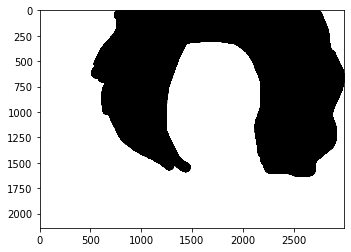

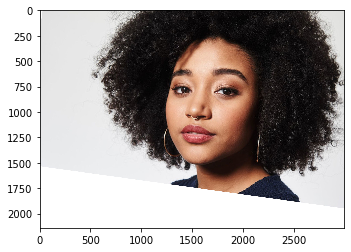

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


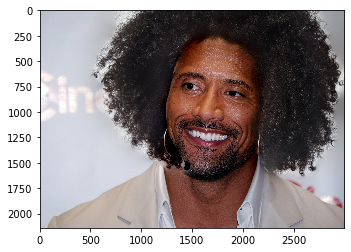

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


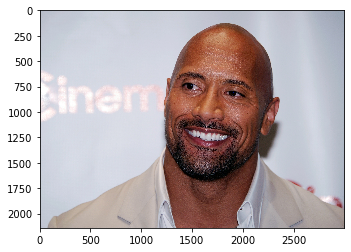

In [35]:
show(mask_hair)
show(image_hair)
show(image_blended)
show(collapse_lappyr(lappyr_bald))

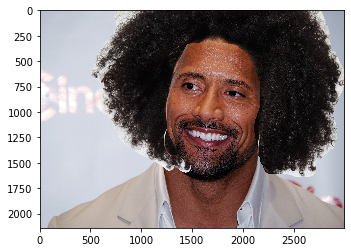

In [12]:
mask = mask_hair
blended_single = mask * image_bald + (1.0-mask) * image_hair
show(blended_single)

In [21]:
[1, 2, 3, 4, 5, 6, 7][::-1]

[7, 6, 5, 4, 3]